# read the data and the required libraries

In [1]:
import pandas as pd
import os
os.listdir()
import matplotlib.pyplot as plt
import numpy as np

In [36]:
train = pd.read_csv('data/Train.csv')
train.head(60)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
5,ID_00D3EF6,2010-10-21,2011-10-20,Male,37,2010-10-21,2,NaN,NaN,NaN,NaN,NaN,Car Classic,0
6,ID_00HHZ8Y,2010-08-02,2011-08-01,Female,40,2010-08-02,3,NaN,NaN,NaN,Ikeja,Lagos,CVTP,0
7,ID_00M1X6U,2010-09-12,2011-09-11,Male,43,2010-09-12,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe,0
8,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Benue,Car Classic,0
9,ID_00QF156,2010-12-18,2011-12-17,Female,58,2010-12-18,1,NaN,NaN,NaN,Eti-Osa,Eti-Osa,Car Classic,0


In [4]:
train.shape

(12079, 14)

In [14]:
nul = train.isnull().sum().reset_index()
nul.columns = ["columnms","Nulls"]
nul["Percentage"] = [str(round(i,3))+ "%" for i in round(nul.Nulls/train.shape[0],3)*100]
nul


,columnms,Nulls,Percentage
0,ID,0,0.0%
1,Policy Start Date,0,0.0%
2,Policy End Date,0,0.0%
3,Gender,359,3.0%
4,Age,0,0.0%
5,First Transaction Date,0,0.0%
6,No_Pol,0,0.0%
7,Car_Category,3738,30.9%
8,Subject_Car_Colour,6962,57.6%
9,Subject_Car_Make,2476,20.5%


### Make a comment here: eg some variables have very high nulls (around 50%) eg Name and state of the respondent as well as car color and the car category

## clean the date columns

In [17]:
print(type(train["Policy Start Date"]))

<class 'pandas.core.series.Series'>


In [18]:
train["Policy Start Date"] = pd.DatetimeIndex(train["Policy Start Date"])
train["Policy End Date"] = pd.DatetimeIndex(train["Policy End Date"])

In [19]:
print(type(train["Policy Start Date"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [21]:
print(type(train["Policy End Date"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# clean Gender

In [22]:
train['Gender'].value_counts()

Male            7617
Female          3327
Entity           277
Joint Gender     223
NOT STATED       175
NO GENDER         66
SEX               35
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

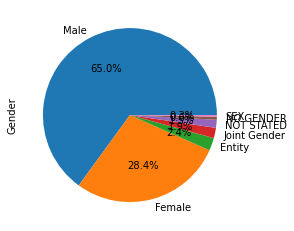

In [23]:
train['Gender'].value_counts().plot(kind = "pie", autopct='%1.1f%%')

In [24]:
train['Gender'].value_counts()

Male            7617
Female          3327
Entity           277
Joint Gender     223
NOT STATED       175
NO GENDER         66
SEX               35
Name: Gender, dtype: int64

In [25]:
clean = []

for i in train['Gender']:
    #print(i)
    if i == "Entity":
        clean.append(np.nan)
    elif i == 'NO GENDER':
        clean.append(np.nan)
    elif i == "SEX":
        clean.append(np.nan)
    elif i == 'NOT STATED':
        clean.append(np.nan)
    else:
        clean.append(i)

train['Gender'] = clean   

#gender = []
#for i in train['Gender']:#if i == 'nan':
   # gender.append(train['Gender'].mode())
    #else:
       # gender.append(i)

<AxesSubplot:ylabel='Gender'>

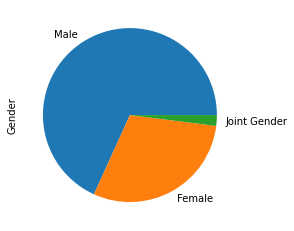

In [27]:
train["Gender"].value_counts().plot(kind = "pie")

# clean the no of policy 

<AxesSubplot:>

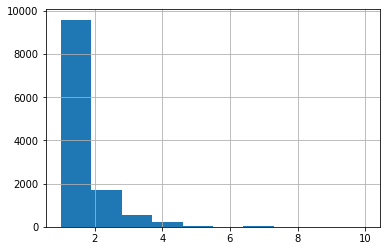

In [30]:
#train.No_Pol.value_counts().plot(kind = "barh")# the data is numeric so a histogram is best
train.head()
train.No_Pol.hist() # comment that a majority has just one policy with decreasing number of policies as the number increases.

In [15]:
train['No_Pol'].value_counts()# No cleaning required here

1     9580
2     1696
3      539
4      206
5       24
7       17
10       9
6        8
Name: No_Pol, dtype: int64

# Clean Age

In [16]:
train['Age'].unique()# A histogram here is also best though I also liked this

array([   30,    79,    43,     2,    20,    37,    40,    71,    58,
          45,    51,   120,    38,    81,    69,    31,    70,    34,
           1,    41,    47,    36,    46,    48,    39,    63,    42,
          27,    64,    50,    53,    33,    23,    32,    59,    60,
          52,    54,    44,    11,    78,    28,    29,    57,    12,
          65,    35,    73,    56,    55,    26,    49,    18,    14,
          62,    25,    61,    72,    82,    67,     7,    10,    68,
          21,    76,    24,    66,     3,    93,    22,    77,    19,
          80,     9,     6,   -76,    -2,    89,    74,    75,    84,
          16,    90,   140,     8,     5,    13,    86,    15,   320,
         -12,    83,    85, -6099, -5939,     4,   -22,   144,   112,
          17,     0,    88,   -27,    87,   133,   102,   -51,   128,
         -26,   100], dtype=int64)

<AxesSubplot:>

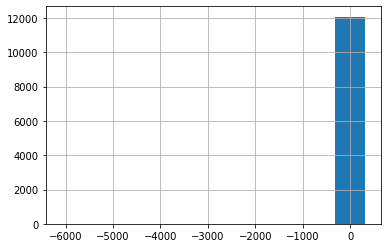

In [31]:
train['Age'].hist() # shows some negative numbers are present in the data

In [34]:
clean = []
for ages in train.Age:
    if ages <18:
        clean.append(np.nan)
    elif ages >100:
        clean.append(np.nan)
    else:
        clean.append(ages)
train['Age'] = clean
        

<AxesSubplot:ylabel='Frequency'>

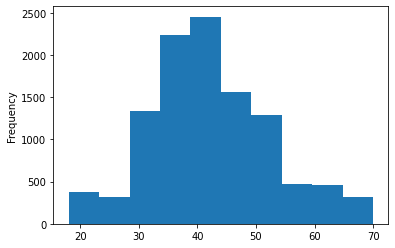

In [35]:
train['Age'].plot(kind = "hist")# the age now is between 18 and 100

# clean product name (Insurance name)

<AxesSubplot:>

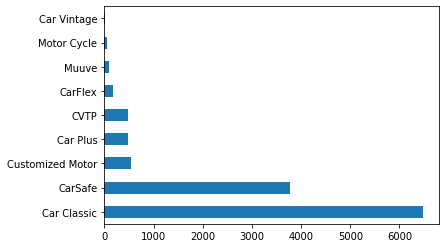

In [37]:
train['ProductName'].value_counts().plot(kind = "barh")

<AxesSubplot:ylabel='ProductName'>

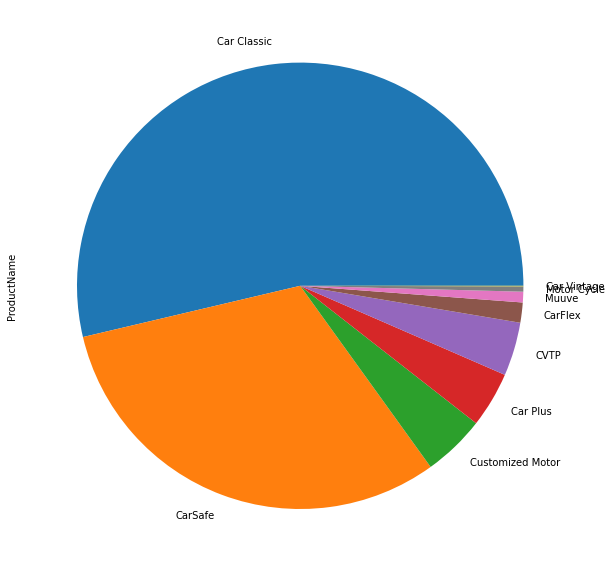

In [53]:
train['ProductName'].value_counts().plot(kind = "pie" , figsize = (10,11)) # No changes required here

# Car Category cleaning

In [49]:
train['Car_Category'].value_counts()

Saloon          6047
JEEP            2021
Truck             97
Bus               54
Mini Bus          36
Pick Up           31
Motorcycle        17
Van               16
Wagon             10
Tipper Truck       1
Name: Car_Category, dtype: int64

In [50]:
cars = []
for i in train['Car_Category']:
    #print(i)
    if i in ["CAMRY CAR HIRE","Sedan" ]:
        cars.append("Saloon")
    elif i in ['Mini Van','Mini Bus','Van']:
        cars.append("Bus")
    elif i in ["Pick Up > 3 Tons"]:
        cars.append("Pick Up")
    elif i in ["Shape Of Vehicle Chasis"]:
        cars.append(np.nan)
    elif i in ["Station 4 Wheel"]:
        cars.append(np.nan)
    else:
        cars.append(i)
train['Car_Category']=cars

<AxesSubplot:ylabel='Car_Category'>

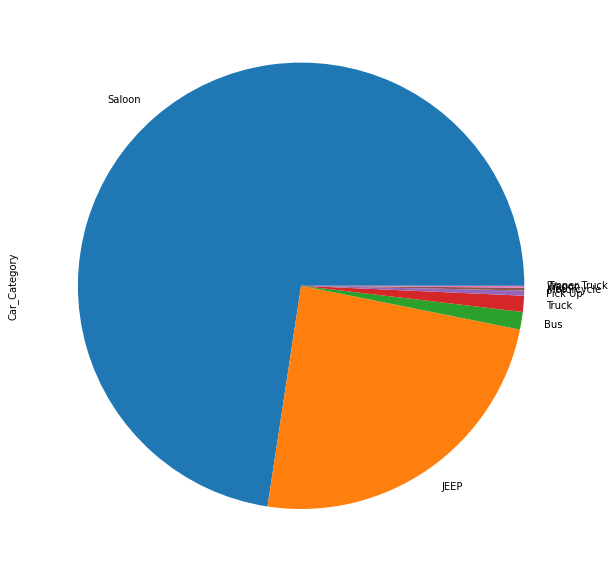

In [51]:
train['Car_Category'].value_counts().plot(kind = "pie", figsize = (10,11))

In [52]:
train.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1


In [53]:
#Clean the colors

In [54]:
train["Subject_Car_Colour"].unique()

array(['Black', 'Grey', 'Red', nan, 'As Attached', 'Blue', 'Silver',
       'Green', 'Ash', 'White', 'Gray & Gray', 'Wine', 'Brown',
       'Red & Blue', 'Gold', 'Gray & Silver', 'Orange', 'Red & Black',
       'Dark Grey', 'White & Red', 'Light Green', 'Dark Gray', 'B.Silver',
       'Purple', 'Blue & Red', 'Red & Yellow', 'Yellow', 'Red & White',
       'D. Red', 'Dark Red', 'Black & White', 'White & Blue', 'Cream',
       'Dark Green', 'D. Gold', 'Champagne', 'Light Blue',
       'Blue&White&Red', 'White & Yellow', 'Dark Blue', 'Black & Orange',
       'Burgundy', 'Yellow & White', 'Beige Mitalic', 'Light Gray',
       'Blue Sky'], dtype=object)

In [55]:
train["Subject_Car_Colour"].value_counts()

Black             1880
Silver             554
Grey               514
As Attached        498
Blue               361
White              293
Red                251
Green              233
Gold               173
Ash                133
Wine                89
Brown               58
Yellow               8
Cream                8
White & Blue         5
Orange               5
Dark Gray            5
Red & White          4
Purple               4
Blue & Red           3
D. Red               3
Light Green          3
Gray & Gray          2
Dark Grey            2
B.Silver             2
Red & Black          2
Black & Orange       2
Dark Blue            2
Black & White        2
Gray & Silver        2
White & Red          2
D. Gold              1
Burgundy             1
Red & Yellow         1
Dark Red             1
Yellow & White       1
Blue&White&Red       1
Blue Sky             1
Light Gray           1
Red & Blue           1
Champagne            1
Light Blue           1
White & Yellow       1
Beige Mital

<AxesSubplot:>

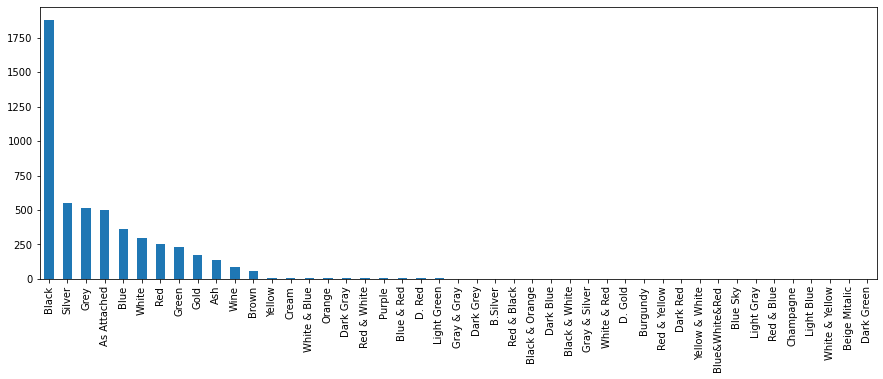

In [56]:
train["Subject_Car_Colour"].value_counts().plot(kind = "bar",figsize = (15,5))

In [57]:
color = []
for colour in train["Subject_Car_Colour"]:
    #print(i)
    if colour in ["D. Red" ]:
        color.append("Red")
    elif colour in ["D. Gold" ]:
        color.append("Gold")
    elif colour in ["B.Silver"]:
        color.append("Silver")
    elif colour in ["As Attached"]:
        color.append(np.nan)
    else:
        color.append(colour)
train["Subject_Car_Colour"]=color

# Clean the car make

In [58]:
train["Subject_Car_Make"].unique()

array(['TOYOTA', nan, 'REXTON', 'Lexus', 'Hyundai', 'Iveco', 'DAF',
       'Honda', 'Mercedes', 'Jincheng', 'ACURA', 'Ford', 'Volkswagen',
       'Nissan', '.', 'Pontiac', 'Range Rover', 'Kia', 'Mitsubishi',
       'Scania', 'BMW', 'Infiniti', 'Renault', 'Volvo', 'Hummer', 'Mack',
       'Grand Cherokee', 'Porsche', 'Peugeot', 'Land Rover', 'Chevrolet',
       'Mazda', 'Man', 'Jeep', 'Audi', 'Suzuki', 'MINI COOPER', 'KA',
       'As Attached', 'Innson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler',
       'Dodge', 'GMC', 'Land Rover.', 'Subaru', 'GAC', 'Fiat', 'Opel',
       'Astra', 'Motorcycle', 'ZOYTE', 'Seat', 'FOTON', 'Howo', 'Lincoln',
       'Rols Royce', 'CHANGAN', 'LIBERTY', 'ABG', 'Yamaha', 'Black',
       'Tata', 'Ashok Leyland', 'Geely', 'Caddillac', 'Wrangler Jeep',
       'Raston', 'MG', 'BRILLIANCE', 'Buik', 'COMMANDER', 'Bajaj'],
      dtype=object)

<AxesSubplot:>

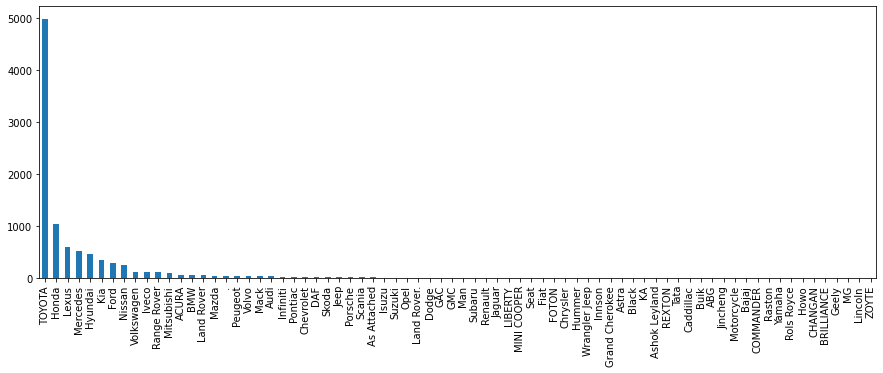

In [59]:
train["Subject_Car_Make"].value_counts().plot(kind = "bar",figsize = (15,5))

In [61]:
train["Subject_Car_Make"] = train["Subject_Car_Make"].astype(str)

In [62]:
car_names = []
for name in train["Subject_Car_Make"]:
    name.lower()
    if name in ["."]:
        car_names.append(np.nan)
    elif name in ["As Attached"]:
        car_names.append(np.nan)
    else:
        car_names.append(name)
train["Subject_Car_Make"] = car_names
        
    

In [63]:
train["Subject_Car_Make"].unique()

array(['TOYOTA', 'nan', 'REXTON', 'Lexus', 'Hyundai', 'Iveco', 'DAF',
       'Honda', 'Mercedes', 'Jincheng', 'ACURA', 'Ford', 'Volkswagen',
       'Nissan', nan, 'Pontiac', 'Range Rover', 'Kia', 'Mitsubishi',
       'Scania', 'BMW', 'Infiniti', 'Renault', 'Volvo', 'Hummer', 'Mack',
       'Grand Cherokee', 'Porsche', 'Peugeot', 'Land Rover', 'Chevrolet',
       'Mazda', 'Man', 'Jeep', 'Audi', 'Suzuki', 'MINI COOPER', 'KA',
       'Innson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler', 'Dodge', 'GMC',
       'Land Rover.', 'Subaru', 'GAC', 'Fiat', 'Opel', 'Astra',
       'Motorcycle', 'ZOYTE', 'Seat', 'FOTON', 'Howo', 'Lincoln',
       'Rols Royce', 'CHANGAN', 'LIBERTY', 'ABG', 'Yamaha', 'Black',
       'Tata', 'Ashok Leyland', 'Geely', 'Caddillac', 'Wrangler Jeep',
       'Raston', 'MG', 'BRILLIANCE', 'Buik', 'COMMANDER', 'Bajaj'],
      dtype=object)

<AxesSubplot:ylabel='LGA_Name'>

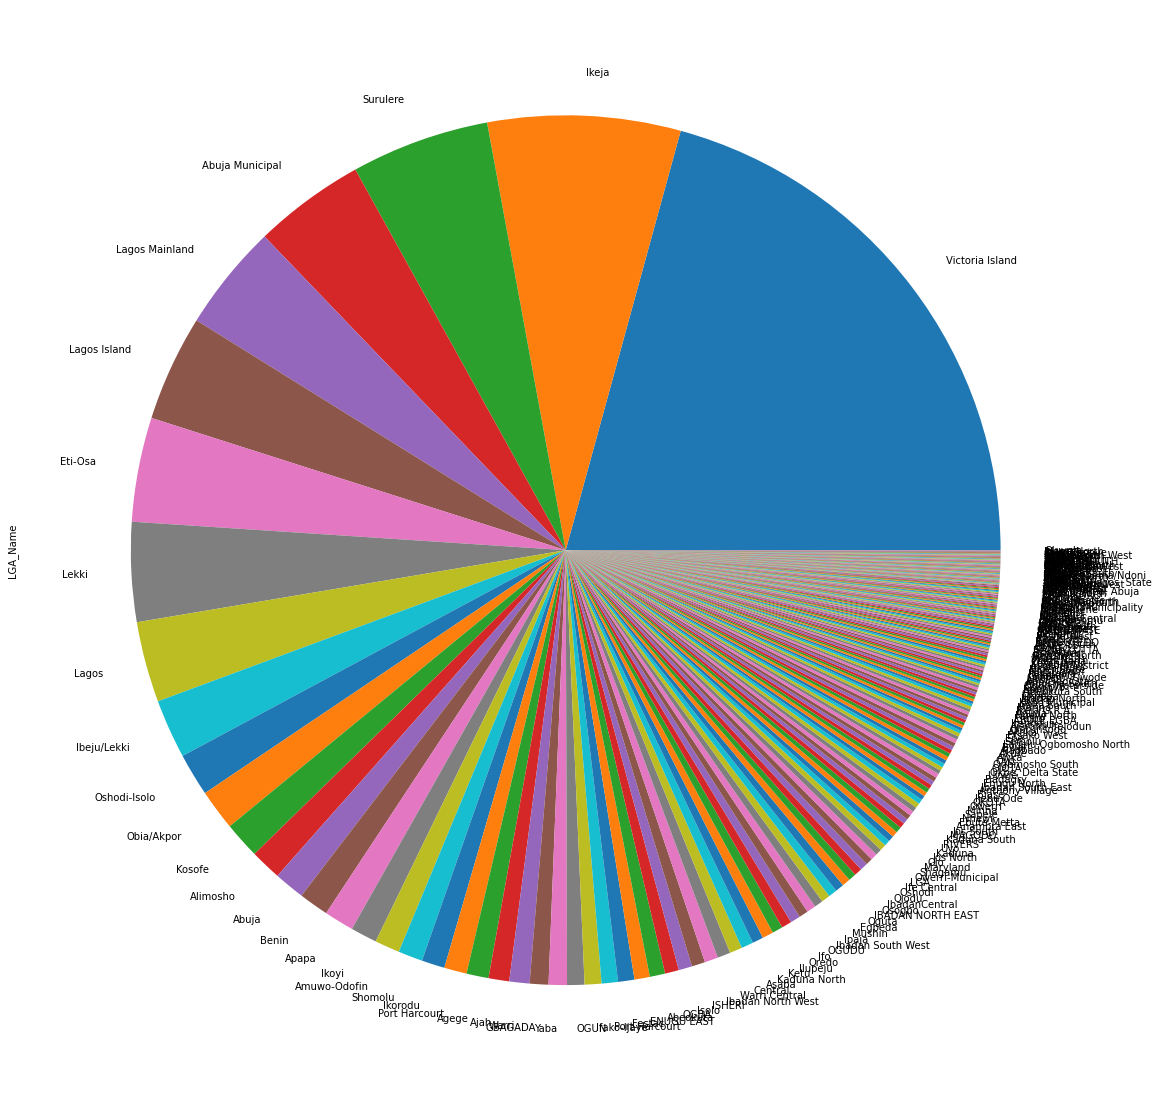

In [103]:
train["LGA_Name"].value_counts().plot(kind = "pie",figsize = (20,20))

In [64]:
train["LGA_Name"].value_counts()

Victoria Island    1162
Ikeja               401
Surulere            288
Abuja Municipal     232
Lagos Mainland      222
                   ... 
kumbotso              1
Orsu                  1
Ughelli North         1
Owerri North          1
AKOKO-EDO             1
Name: LGA_Name, Length: 258, dtype: int64

# clean the States

<AxesSubplot:>

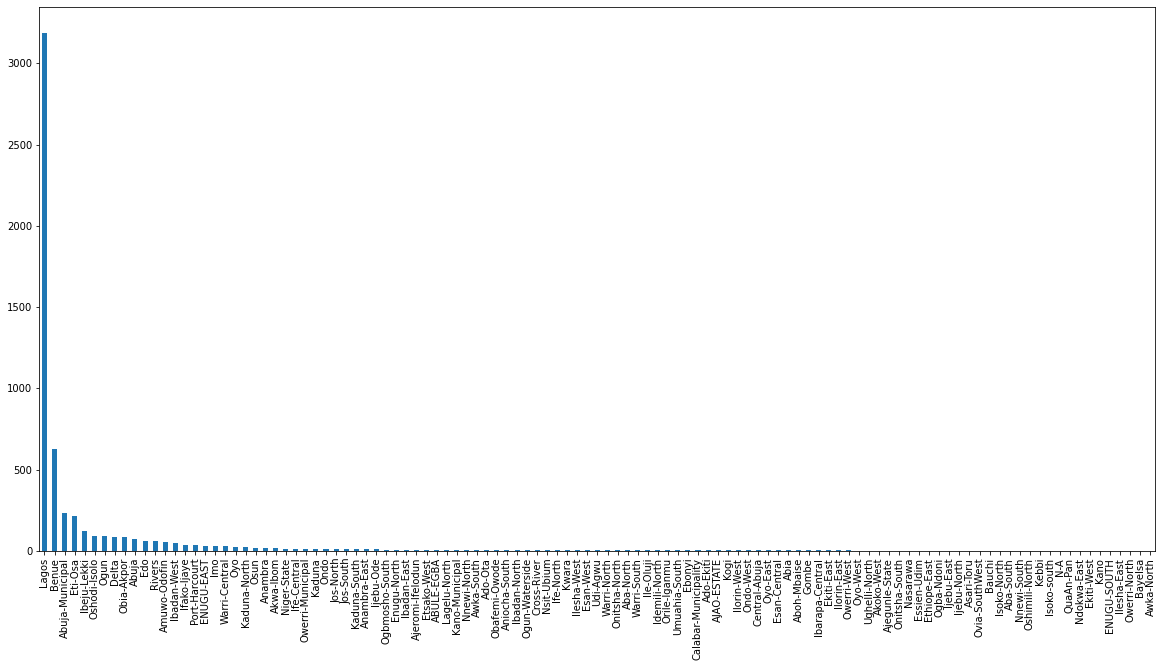

In [65]:
train["State"].value_counts().plot(kind = "bar",figsize = (20,10))

# Check the targets

In [71]:
train.target.value_counts() # this is a very imbalanced dataset

0    10624
1     1455
Name: target, dtype: int64

# research questions

* whats the corelation between insurance and all the variables
* does color corelate with insurance (particularly black, grey and white)
* is there any relationship between state/region and insurance claims

-  we should investigate this further in the bivariate analysis.

In [72]:
# the clean dataset
train.to_csv("data/Cleaned_train_1.csv")